<a href="https://colab.research.google.com/github/aarakova/VvAD/blob/lab3/%D0%9B%D0%A03_%D0%A0%D0%B0%D0%BA%D0%BE%D0%B2%D0%B0_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Цель работы
Изучение алгоритмов и методов регрессии на практике.

## Часть 1. Простая линейная *регрессия*

### Моделирование данных

Работа выполняется по варианту №5.

In [40]:
y = [25.3, 28.8, 30.1, 30, 32.5, 31.4, 32]
x1 = [3, 3, 6, 6, 7, 8, 9]
x2 = [9, 8, 9, 7, 4, 5, 3]

Оборачиваем данные в датафрейм

In [41]:
import pandas as pd

df = pd.DataFrame({'x1': x1, 'y': y})
df

,x1,y
0,3,25.3
1,3,28.8
2,6,30.1
3,6,30.0
4,7,32.5
5,8,31.4
6,9,32.0


### Линейная регрессия

Обучение модели линейной регрессии

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['x1']], df['y'])

LinearRegression()

Вывод коэффициентов

In [43]:
b = model.intercept_
a = model.coef_[0]

print(f'a = {a}')
print(f'b = {b}')

a = 0.9062499999999999
b = 24.576785714285712


Была получена модель линейной регрессии вида:

$$ y = 0.91 x + 24.58$$

Эта модель линейная, ее график представляет собой прямую, которая пересекает ось y в точке 24.58, имеет наклон 0.91 и отражает положительную зависимость целевой переменной от признака.

### Предсказания

Выполнение предсказаний

In [44]:
y_pred = model.predict(df[['x1']])
df['pred'] = y_pred

df

,x1,y,pred
0,3,25.3,27.295536
1,3,28.8,27.295536
2,6,30.1,30.014286
3,6,30.0,30.014286
4,7,32.5,30.920536
5,8,31.4,31.826786
6,9,32.0,32.733036


Создание датафрейма с реальными значениями и предсказанными

In [45]:
results = pd.DataFrame({'Actual': df['y'], 'Predicted': y_pred})
results

,Actual,Predicted
0,25.3,27.295536
1,28.8,27.295536
2,30.1,30.014286
3,30.0,30.014286
4,32.5,30.920536
5,31.4,31.826786
6,32.0,32.733036


### Метрики
Подсчитываем и выводим метрики качества регрессии (MSE, MAE, RMSE, R2)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(df['y'], y_pred)
mae = mean_absolute_error(df['y'], y_pred)
rmse = mse ** 0.5
r2 = r2_score(df['y'], y_pred)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')

MSE: 1.3524744897959187, MAE: 0.9056122448979593, RMSE: 1.1629593672162062, R2: 0.7351692375319692


R² = 0.74. Коэффициент детерминации показывает, что модель объясняет около 74% дисперсии целевой переменной. У модели умеренная предсказательная способность.

MSE = 1.35. В среднем квадрат ошибок предсказания составляет 1.35.

RMSE = 1.16. Предсказанные значения модели, в среднем, отклоняются от фактических значений на 1.16.

MAE = 0.91. Значение указывает на то, что, в среднем, предсказания модели отклоняются от реальных значений на 0.91.

### Графики
Визуализация регрессии: scatter plot и линия регрессии

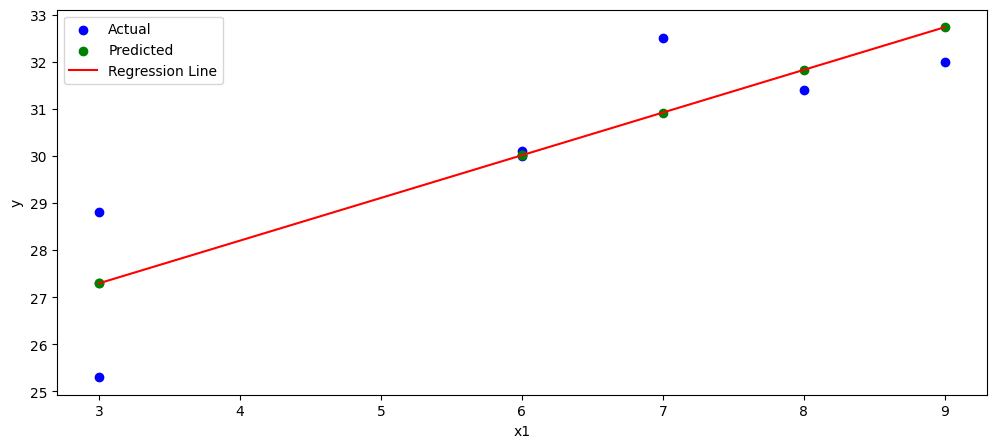

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.scatter(df['x1'], df['y'], color='blue', label='Actual')
plt.scatter(df['x1'], df['pred'], color='green', label='Predicted')
plt.plot(df['x1'], y_pred, color='red', label='Regression Line')

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

- Предсказания отличаются от истинных значений — заметны отклонения

- У данных есть тренд, который уловила модель

- Явных выбросов не замечено

График остатков - график с разностями предсказанных и истинных значений

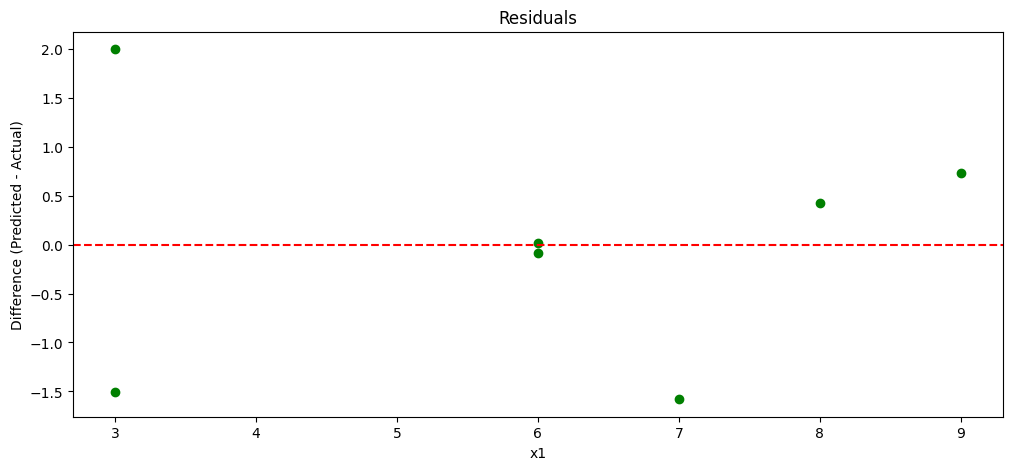

In [48]:
plt.figure(figsize=(12, 5))

plt.scatter(df['x1'], y_pred - df['y'], color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('x1')
plt.ylabel('Difference (Predicted - Actual)')

plt.show()

* Остатки варьируются вокруг нуля, что ожидаемо, но есть значительные отклонения, особенно для значений с разностью 2 и -2, но так как данных слишком мало, нельзя сказать, что это выбросы.
* Нет явной структуры — отсутствуют заметные паттерны.

График предсказаний и истинных значений

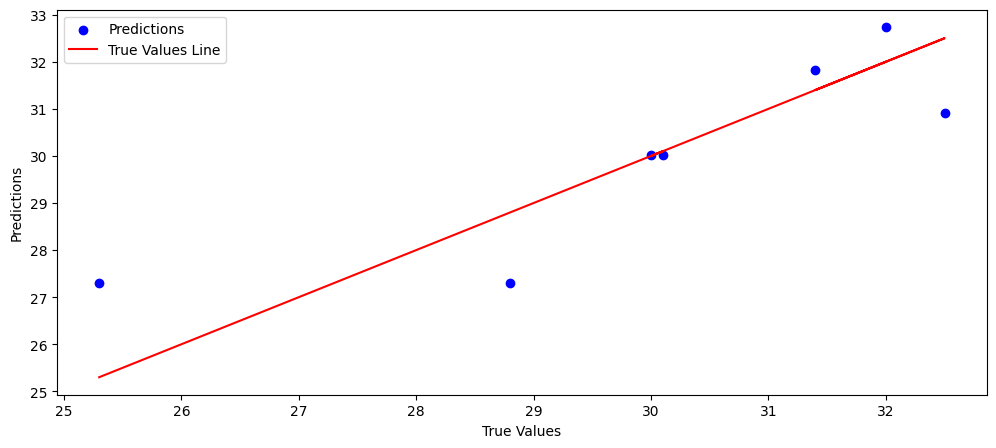

In [49]:
plt.figure(figsize=(12, 5))


plt.scatter(df['y'], df['pred'], color='blue', label='Predictions')

plt.plot(df['y'], df['y'], color='red', label='True Values Line')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.show()

Модель не идеальна, но улавливает общий тренд (точки примерно следуют направлению линии)

### Вывод
В ходе первой части лабораторной работы была построена модель линейной регрессии на одном признаке, получены предсказания, высчитаны метрики. Значение коэффициента детерминации - удовлетворительное.

Был построен график регрессии и график остатков.

## Часть 2. Полиномиальная регрессия

### Моделирование данных

In [50]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [29.8, 58.8, 72.2, 101.5, 141.0, 135.1, 156.6]

df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,0,29.8
1,1,58.8
2,2,72.2
3,3,101.5
4,4,141.0
5,5,135.1
6,6,156.6


### Полиномиальная регрессия степени 2
Применение PolynomialFeatures

In [51]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(df[['x']])

X_poly

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

Получены полиномиальные признаки для x. Это позволило преобразовать входные данные, добавив нелинейные зависимости и повысив гибкость модели.

Применение линейной регрессии к полиномиальным признакам

In [52]:
model = LinearRegression()
model.fit(X_poly, df['y'])

b = model.intercept_
a = model.coef_[0]

print(f'a = {a}')
print(f'b = {b}')

a = 0.0
b = 28.045238095238133


Получение предсказаний и вычисление метрик


In [53]:
y_pred = model.predict(X_poly)

mae = mean_absolute_error(df['y'], y_pred)
r2 = r2_score(df['y'], y_pred)

print(f"MAE = {mae}")
print(f"R2 = {r2}")

MAE = 5.834013605442182
R2 = 0.9685104149642331


Коэффициент детерминации равен 0.9685, это демонстрирует высокую точность модели, объясняя около 96.85% вариации в данных.

График полиномиальной регрессии степени 2

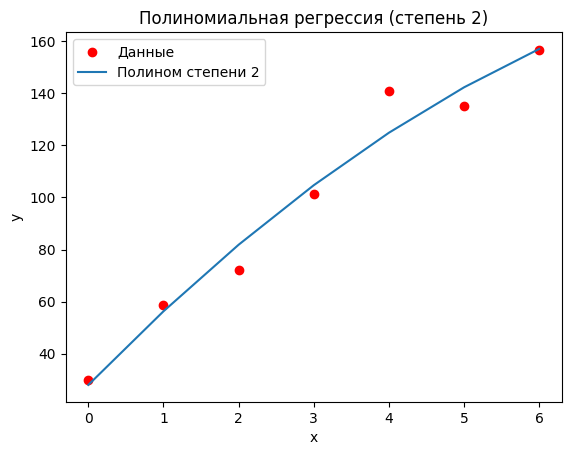

In [54]:
plt.scatter(df['x'], df['y'], color='red', label='Данные')
plt.plot(df['x'], y_pred, label=f'Полином степени {degree}')
plt.title(f'Полиномиальная регрессия (степень {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Видно, что модель хорошо описывает нелинейную зависимость между 𝑥 и 𝑦, проходя близко к точкам данных, что указывает на точное аппроксимирование исходных значений с использованием полинома второй степени.

### Полиномиальная регрессия степени 4
Применение PolynomialFeatures

In [18]:
degree = 4
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(df[['x']])

X_poly

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]])

Получены полиномиальные признаки для x

Применение линейной регрессии к полиномиальным признакам

In [19]:
model = LinearRegression()
model.fit(X_poly, df['y'])

b = model.intercept_
a = model.coef_[0]

print(f'a = {a}')
print(f'b = {b}')

a = 0.0
b = 31.56471861471617


Получение предсказаний и вычисление метрик

In [20]:
y_pred = model.predict(X_poly)

mae = mean_absolute_error(df['y'], y_pred)
r2 = r2_score(df['y'], y_pred)

print(f"MAE = {mae}")
print(f"R2 = {r2}")

MAE = 6.2232529375384065
R2 = 0.9729197975186293


Среднее отклонение составляет около 6.22, что означает, что модель в среднем ошибается на эту величину при прогнозировании.

Значение коэффициента детерминации ≈ 0.973 (или 97.3%), говорит о том, что модель хорошо объясняет изменения в данных и предсказания близки к фактическим значениям.

Таким образом, модель с полиномиальными признаками степени 4 хорошо подходит для описания зависимости между 𝑥 и 𝑦, обеспечивая высокую точность предсказаний.

График полиномиальной регрессии степени 4

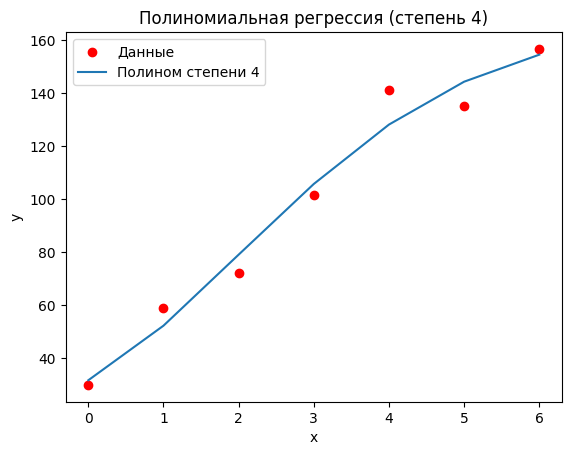

In [21]:
plt.scatter(df['x'], df['y'], color='red', label='Данные')
plt.plot(df['x'], y_pred, label=f'Полином степени {degree}')
plt.title(f'Полиномиальная регрессия (степень {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Линия регрессии проходит близко к большинству точек, хорошо отражая общую тенденцию. Это подтверждает, что модель 4-й степени лучше соответствует данным, чем линейная или квадратичная модели, так как она лучше захватывает нелинейные колебания в распределении данных.

### Вывод

Во второй части была выполнена полиномиальная регрессия для аппроксимации зависимостей в данных. Были получены полиномиальные признаки и построены модели степени 2 и 4, после чего произведена оценка их точности с помощью метрик MAE и $R^2$.

* **Модель степени 2**: показала высокое значение $R^2$ и низкое MAE, что свидетельствует о хорошем приближении данных, но с некоторыми отклонениями.
* **Модель степени 4**: продемонстрировала ещё более высокое значение $R^2$, что указывает на лучшее соответствие данным и более точное моделирование нелинейной зависимости.

Таким образом, более высокая степень полинома позволила модели лучше подстроиться под исходные данные, что улучшило точность. Однако, важно учитывать баланс между точностью и сложностью модели, чтобы избежать переобучения.

## Часть 3. Решение задачи регрессии различными методами

### Загрузка и обзор данных

In [23]:
df = pd.read_csv('car_price.csv')

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**Информация о столбцах:**


| Название столбца    | Описание                                                                 |
|----------------------|--------------------------------------------------------------------------|
| Car_ID               | Уникальный идентификатор каждого наблюдения (целое число)                |
| Symboling            | Присвоенный рейтинг страхового риска: <br> -3 — автомобиль является рискованным, <br> -3 — довольно безопасен (категориальный) |
| carCompany           | Название автомобильной компании                                           |
| fueltype             | Тип топлива автомобиля                                                    |
| aspiration           | Аспирация, используемая в автомобиле                                      |
| doornumber           | Количество дверей в автомобиле                                            |
| carbody              | Кузов автомобиля                                                         |
| drivewheel           | Тип ведущего колеса                                                      |
| enginelocation       | Расположение двигателя автомобиля                                         |
| wheelbase            | Колесная база автомобиля                                                 |
| carlength            | Длина машины                                                             |
| carwidth             | Ширина машины                                                            |
| carheight            | Высота машины                                                            |
| curbweight           | Вес автомобиля без пассажиров и багажа                                   |
| enginetype           | Тип двигателя                                                            |
| cylindernumber       | Количество цилиндров в автомобиле                                         |
| enginesize           | Размер двигателя                                                          |
| fuelsystem           | Топливная система автомобиля                                             |
| boreratio            | Коэффициент расточки двигателя                                           |
| stroke               | Ход поршня или объем внутри двигателя (числовой)                        |
| compressionratio     | Степень сжатия внутри двигателя                                          |
| horsepower           | Мощность в лошадиных силах                                              |
| peakrpm              | Пиковые обороты автомобиля                                               |
| citympg              | Пробег по городу                                                         |
| highwaympg           | Пробег по шоссе                                                         |
| price                | Цена автомобиля                                                          |


**Предметная область:**

Таблица содержит данные о характеристиках автомобилей, включая информацию о размерах, типах двигателей, параметрах безопасности и топливной эффективности. Этот набор данных подходит для анализа и прогнозирования цен на автомобили на основе их различных характеристик.

### Целевая переменная
Целевая переменная для регрессии: price — цена автомобиля, которая будет предсказываться на основе других характеристик.

Гистограмма и BoxPlot для целевой переменной

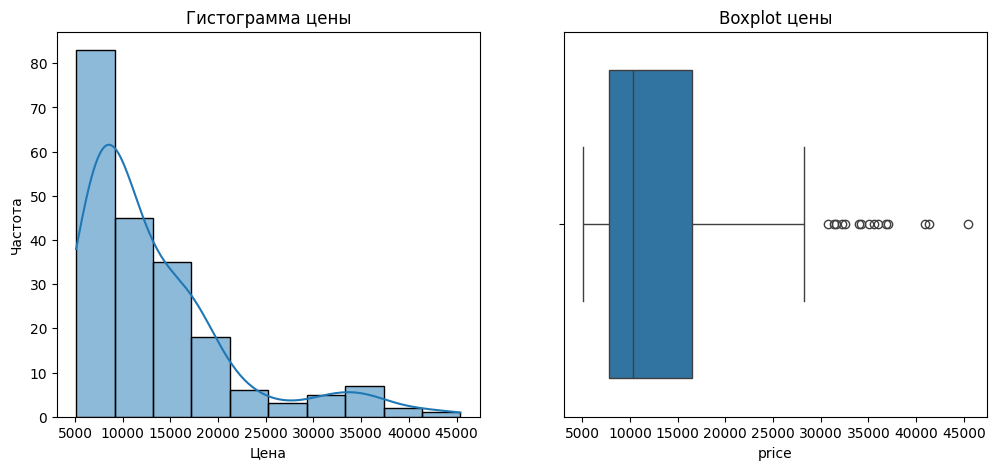

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Гистограмма цены')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot цены')
plt.show()

На гистограмме цены (слева) видно, что большинство автомобилей имеет цену в диапазоне от 5000 до 15000. С увеличением цены количество автомобилей резко снижается, что создает положительно скошенное (правостороннее) распределение. Наблюдается длинный "хвост" с правой стороны, что указывает на наличие более дорогих автомобилей, которые встречаются реже.

Boxplot (справа) цены подтверждает эту асимметрию. Верхняя граница усов превышает 30,000, и есть отдельные значения, уходящие за эту границу, но по текущим данным нельзя утверждать, что эти значения являются выбросами.

### Связи между признаками

In [25]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

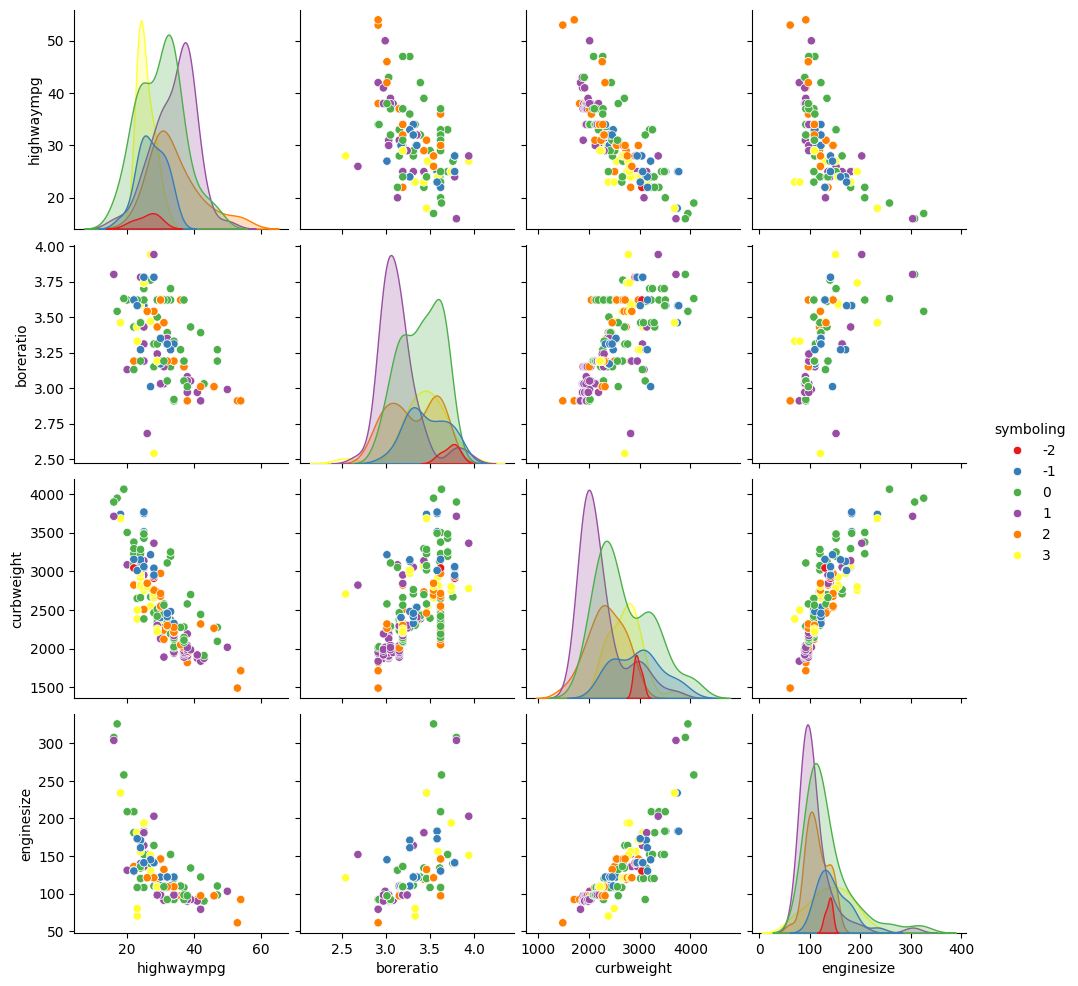

In [26]:
sns.pairplot(df[['highwaympg', 'boreratio', 'curbweight',
                   'enginesize', 'symboling']],
             hue='symboling', diag_kind='kde', palette='Set1')

**Графики:**
* highwaympg (диагональ): Мультимодальное распределение с несколькими пиками. Показано, что автомобили с более высокой экономичностью на шоссе имеют больше положительных значений риска.

**Связи между переменными:**

* boreratio vs highwaympg: Слабая отрицательная корреляция. С увеличением экономичности на шоссе коэффициент расточки двигателя снижается.
* curbweight vs highwaympg: Сильная отрицательная корреляция. Чем больше вес автомобиля, тем ниже экономичность на шоссе.
* enginesize vs highwaympg: Сильная отрицательная корреляция. Автомобили с большими двигателями показывают худшую экономичность.
* curbweight vs boreratio: Слабая положительная корреляция, где более тяжелые автомобили имеют больший коэффициент расточки.
* enginesize vs curbweight: Сильная положительная корреляция между размером двигателя и весом автомобиля, что логично, так как более мощные двигатели чаще устанавливаются на более тяжелые автомобили.

**Зависимость от symboling (риск):**

* Автомобили с лучшей экономичностью на шоссе (высокий highway mpg) имеют более положительные значения symboling, но более высокие значения symboling часто соответствуют более рискованным автомобилям.
* Более тяжелые автомобили с большими двигателями также чаще имеют более рискованные рейтинги.

### Разбиение и нормализация данных

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cat_columns = [x for x in df.columns if df[x].dtype == 'object']
df = df.drop(columns=cat_columns + ['car_ID'])

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {len(X_train) / len(df) * 100}%")
print(f"Test: {len(X_test) / len(df) * 100}%")

Train: 80.0%
Test: 20.0%


Данные разбились ровно на 80% и 20%

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Нормализация данных была проведена с помощью StandardScaler

### Линейная регрессия

In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')

MSE: 14358029.116948424, MAE: 2680.429983159425, RMSE: 3789.1990073033144, R2: 0.8181239192410048


Был создан датафрейм с метриками для моделей

In [30]:
metrics = pd.DataFrame(columns=['MSE', 'MAE', 'RMSE', 'R2'])

metrics.loc['Linear Regression'] = [mse, mae, rmse, r2]

metrics

,MSE,MAE,RMSE,R2
Linear Regression,1.435803e+07,2680.429983,3789.199007,0.818124


Была получена линейная регрессия с достаточно выскоим показателем коэффициента детерминации

In [31]:
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}).reset_index(drop=True)

results.head(10)

,Actual,Predicted
0,30760.000,26985.717396
1,17859.167,16995.755509
2,9549.000,10411.078676
3,11850.000,14813.778549
4,28248.000,25159.104265
5,7799.000,6150.860604
6,7788.000,9435.103348
7,9258.000,6814.439283
8,10198.000,11647.160922
9,7775.000,10268.440288


Был создан датафрейм с истинными и предсказанными значениями

In [32]:
coefs = pd.DataFrame({'Feature': X.columns, 'Coef': model.coef_})
coefs = coefs.sort_values(by='Coef', ascending=False)

coefs

,Feature,Coef
6,enginesize,4976.563274
13,highwaympg,1446.907456
9,compressionratio,1387.225279
11,peakrpm,1274.450443
3,carwidth,1112.646820
1,wheelbase,835.387850
10,horsepower,719.211340
4,carheight,497.057372
0,symboling,259.207046
5,curbweight,227.500700


Был создан датафрейм с коэффициентами важности признаков

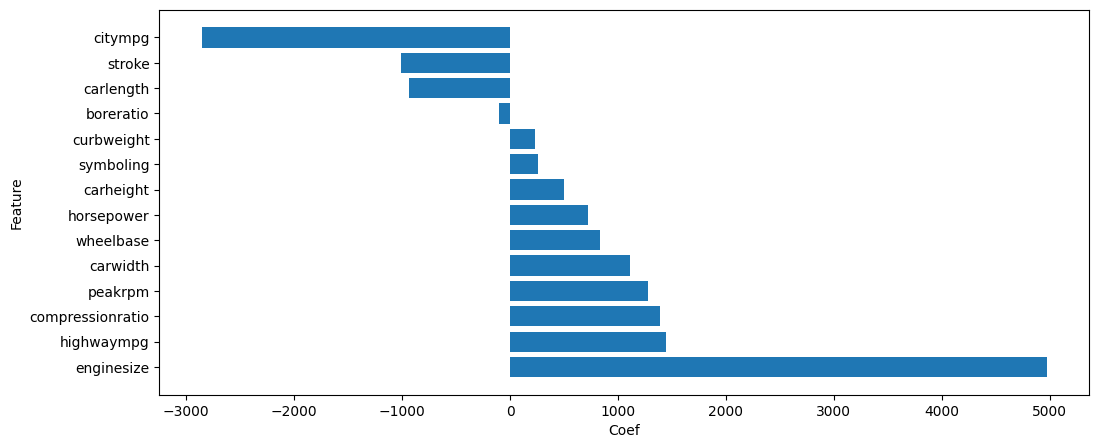

In [33]:
plt.figure(figsize=(12, 5))
plt.barh(coefs['Feature'], coefs['Coef'])
plt.xlabel('Coef')
plt.ylabel('Feature')
plt.show()

Наиболее влиятельные признаки (положительная корреляция):

* enginesize (размер двигателя) - самое сильное положительное влияние
* highwaympg (расход топлива на шоссе)
* compressionratio (степень сжатия)
* peakrpm (максимальные обороты)
* carwidth (ширина автомобиля)

Наиболее влиятельные признаки (отрицательная корреляция):

* citympg (расход топлива в городе)
* stroke (ход поршня)
* carlength (длина автомобиля)

Признаки с наименьшим влиянием:

* symboling (рейтинг риска) - это подозрительно, скорее всего признак стоило расценивать как категориальный
* curbweight (вес автомобиля)
* boreratio (коэффициент расточки)

Визуализация фактических и предсказанных значений

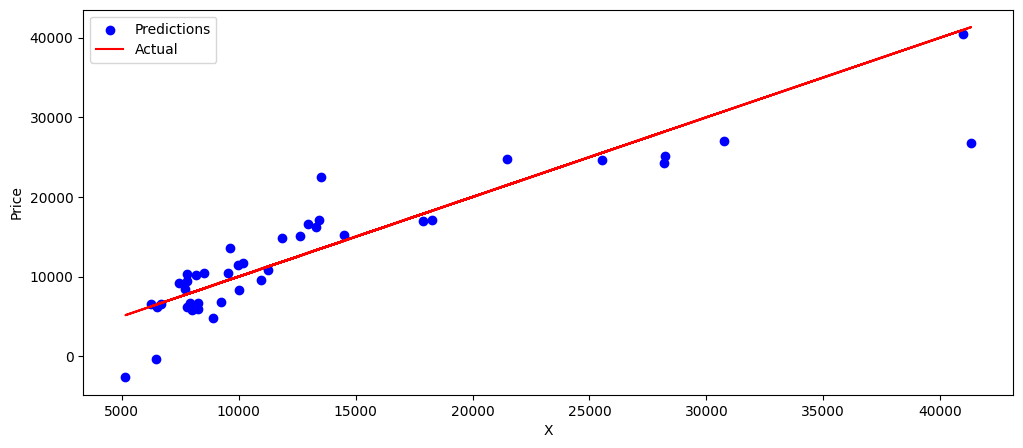

In [34]:
plt.figure(figsize=(12, 5))

plt.scatter(results['Actual'], results['Predicted'], color='blue', label='Predictions')
plt.plot(results['Actual'], results['Actual'], color='red', label='Actual')

plt.xlabel('X')
plt.ylabel('Price')
plt.legend()
plt.show()

Модель линейной регрессии хорошо справляется с предсказанием цены для средней и низкой ценовой категории, но может быть менее точной для более дорогих автомобилей, так как наблюдаются выбросы на верхних значениях цены.

### Дерерво решений

In [35]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')

metrics.loc['Decision Tree'] = [mse, mae, rmse, r2]

results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

MSE: 9252376.33785095, MAE: 2016.8699268292683, RMSE: 3041.7719075977657, R2: 0.8827982634434686


Была построена модель решающего дерева, высчитаны метрики.

Был создан датасет с предсказаниями и истиными значениями.

Коэффициент детерминации у этой модели получился лучший - 0.88. Это очень хороший показатель.

### Сравнение моделей

Для сравнения моделей был построен график предсказаний каждой из них

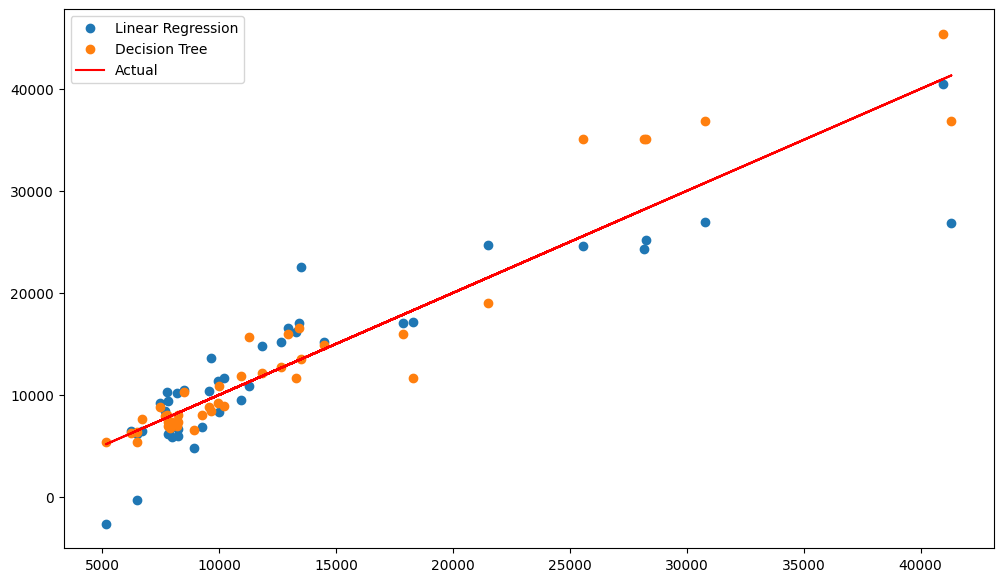

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(results['Actual'], results['Predicted'], 'o', label='Linear Regression')
plt.plot(results_tree['Actual'], results_tree['Predicted'], 'o', label='Decision Tree')

plt.plot(results['Actual'], results['Actual'], color='red', label='Actual')

plt.legend()

plt.show()

Линейная регрессия (синие точки):
* Имеет несколько серьезных выбросов в низком сегменте;
* Занижает предсказания в высоком ценовом сегменте;
* Показывает стабильный линейный тренд;

Decision Tree (оранжевые точки):
* Лучше предсказывает значения в среднем ценовом сегменте;
* Переоценивает предсказания в высоком ценовом сегменте;
* Менее стабильный тренд.

In [37]:
metrics

,MSE,MAE,RMSE,R2
Linear Regression,1.435803e+07,2680.429983,3789.199007,0.818124
Decision Tree,9.252376e+06,2016.869927,3041.771908,0.882798


### Вывод
В третьей части была проведена регрессионная задача с использованием двух различных моделей: линейной регрессии и дерева решений. Обе модели были обучены на предварительно нормализованных данных, а затем оценены с использованием метрик MSE, MAE, RMSE и \( R^2 \).

**Линейная регрессия:**  
- Модель показала высокое значение \( R^2 \), что указывает на её способность объяснять линейные зависимости в данных.  
- Тем не менее, наблюдаются некоторые недостатки: модель занижает предсказания в высоком ценовом сегменте и имеет несколько значительных отклонений в нижнем сегменте.  
- Линейная регрессия лучше всего подходит для задач с линейными зависимостями, однако она может упустить сложные нелинейные структуры в данных.

**Дерево решений:**  
- Модель дерева решений продемонстрировала более высокое значение \( R^2 \) по сравнению с линейной регрессией, что свидетельствует о её точности при работе с нелинейными зависимостями.
- Дерево решений хорошо предсказывает значения в среднем ценовом сегменте, но имеет тенденцию к переоценке стоимости для высоких ценовых значений.
- Эта модель более гибкая и способна выявлять сложные зависимости, однако она подвержена риску переобучения при наличии большого количества узлов и разделений.

Таким образом, модель дерева решений показала себя лучше в условиях сложных, нелинейных зависимостей, что делает её предпочтительным выбором для данной задачи. Однако важно учитывать баланс между точностью и переобучением, особенно для моделей, подобных дереву решений.

## Общий вывод по всей работе:

В ходе работы были исследованы различные методы регрессии для предсказания цены автомобилей на основе их характеристик. Исследование включало три части: простую линейную регрессию, полиномиальную регрессию, а также регрессию с использованием линейной модели и дерева решений.

1. **Первая часть: Простая линейная регрессия**
   - На этом этапе была построена модель линейной регрессии на одном признаке, которая показала удовлетворительное значение коэффициента детерминации \( R^2 \). Модель в целом смогла выявить линейную зависимость между выбранным признаком и ценой автомобиля, но имела некоторые отклонения от фактических значений, что указывает на её ограниченность в условиях более сложных взаимосвязей.

2. **Вторая часть: Полиномиальная регрессия**
   - В этой части была выполнена полиномиальная регрессия для аппроксимации нелинейных зависимостей в данных. Были созданы полиномиальные модели второй и четвертой степени, каждая из которых продемонстрировала высокий коэффициент детерминации \( R^2 \).
   - Модель степени 2 показала хорошее приближение данных с низким MAE, но модель степени 4 ещё более точно соответствовала данным, показывая лучшую способность улавливать нелинейные зависимости. Однако было отмечено, что увеличение степени полинома может привести к переобучению, поэтому важно находить баланс между сложностью модели и её точностью.

3. **Третья часть: Линейная регрессия и дерево решений**
   - На заключительном этапе работы были использованы две модели — линейная регрессия и дерево решений. Линейная регрессия продемонстрировала хороший линейный тренд, но имела недостатки в предсказаниях высоких и низких цен.
   - Дерево решений показало наибольшую точность среди всех моделей, так как лучше справилось с нелинейными зависимостями и сложными структурами данных. Однако модель продемонстрировала тенденцию к переоценке высоких значений, что требует внимательного подхода к её настройке для избежания переобучения.

### Заключение:
В ходе работы было показано, что разные методы регрессии имеют свои сильные и слабые стороны в зависимости от характера данных. Полиномиальные и более сложные модели, такие как дерево решений, лучше подходят для задач с нелинейными зависимостями, тогда как линейная регрессия может быть эффективной для более простых, линейных зависимостей. Итоговый выбор модели должен учитывать баланс между точностью предсказаний и риском переобучения, особенно при работе с более сложными моделями.